# standard

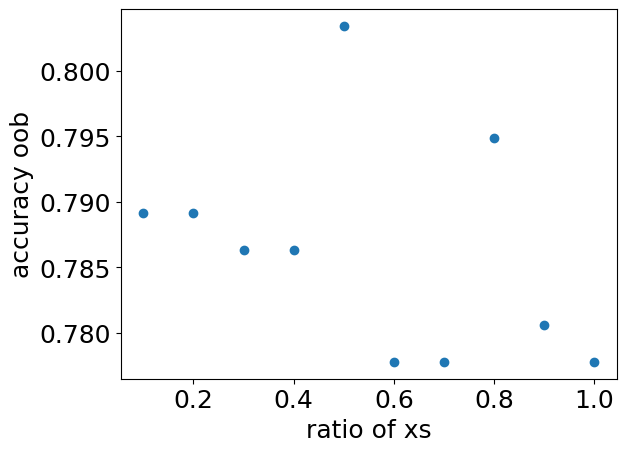

最適なx: 0.5


,importance
Al2O3/SiO2,0.213683
H2O/SiO2,0.126438
NaOH/SiO2,0.190713
KOH/SiO2,0.166685
CsOH/SiO2,0.027775
temperature,0.168315
time,0.106392


In [1]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
dataset=pd.read_csv('zeolite_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)

from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=1000, max_features=ratio_of_x, oob_score=True, random_state=5)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=18
plt.scatter(ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of xs')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")

model=RandomForestClassifier(n_estimators=1000, max_features=optimal_x, oob_score=True, random_state=5)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

In [2]:
phase=list(set(y))
phase.sort()

estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase)
display(confusion_matrix_train)
print(f"訓練データの正答率: {metrics.accuracy_score(y_train, estimated_y_train)}")

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase)
display(confusion_matrix_test)
print(f"テストデータの正答率: {metrics.accuracy_score(y_test, estimated_y_test)}")

,ANA,Amorphous,BPH,CAN,CHA,EDI,ERI/OFF,FAU,GIS,HEU,JBW,KFI,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BPH,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0
HEU,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0


訓練データの正答率: 1.0


,ANA,Amorphous,BPH,CAN,CHA,EDI,ERI/OFF,FAU,GIS,HEU,JBW,KFI,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
BPH,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
EDI,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,1,0,0,8,2,0,0,0,1,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0
HEU,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


テストデータの正答率: 0.7948717948717948


In [3]:
# ANA
precision_train_ANA = metrics.precision_score(y_train, estimated_y_train, labels=["ANA"], average=None)
recall_train_ANA = metrics.recall_score(y_train, estimated_y_train, labels=["ANA"], average=None)
f1_train_ANA = metrics.f1_score(y_train, estimated_y_train, labels=["ANA"], average=None)
precision_test_ANA = metrics.precision_score(y_test, estimated_y_test, labels=["ANA"], average=None)
recall_test_ANA = metrics.recall_score(y_test, estimated_y_test, labels=["ANA"], average=None)
f1_test_ANA = metrics.f1_score(y_test, estimated_y_test, labels=["ANA"], average=None)
# BPH
precision_train_BPH = metrics.precision_score(y_train, estimated_y_train, labels=["BPH"], average=None)
recall_train_BPH = metrics.recall_score(y_train, estimated_y_train, labels=["BPH"], average=None)
f1_train_BPH = metrics.f1_score(y_train, estimated_y_train, labels=["BPH"], average=None)
precision_test_BPH = metrics.precision_score(y_test, estimated_y_test, labels=["BPH"], average=None)
recall_test_BPH = metrics.recall_score(y_test, estimated_y_test, labels=["BPH"], average=None)
f1_test_BPH = metrics.f1_score(y_test, estimated_y_test, labels=["BPH"], average=None)
# CAN
precision_train_CAN = metrics.precision_score(y_train, estimated_y_train, labels=["CAN"], average=None)
recall_train_CAN = metrics.recall_score(y_train, estimated_y_train, labels=["CAN"], average=None)
f1_train_CAN = metrics.f1_score(y_train, estimated_y_train, labels=["CAN"], average=None)
precision_test_CAN = metrics.precision_score(y_test, estimated_y_test, labels=["CAN"], average=None)
recall_test_CAN = metrics.recall_score(y_test, estimated_y_test, labels=["CAN"], average=None)
f1_test_CAN = metrics.f1_score(y_test, estimated_y_test, labels=["CAN"], average=None)
# CHA
precision_train_CHA = metrics.precision_score(y_train, estimated_y_train, labels=["CHA"], average=None)
recall_train_CHA = metrics.recall_score(y_train, estimated_y_train, labels=["CHA"], average=None)
f1_train_CHA = metrics.f1_score(y_train, estimated_y_train, labels=["CHA"], average=None)
precision_test_CHA = metrics.precision_score(y_test, estimated_y_test, labels=["CHA"], average=None)
recall_test_CHA = metrics.recall_score(y_test, estimated_y_test, labels=["CHA"], average=None)
f1_test_CHA = metrics.f1_score(y_test, estimated_y_test, labels=["CHA"], average=None)
# EDI
precision_train_EDI = metrics.precision_score(y_train, estimated_y_train, labels=["EDI"], average=None)
recall_train_EDI = metrics.recall_score(y_train, estimated_y_train, labels=["EDI"], average=None)
f1_train_EDI = metrics.f1_score(y_train, estimated_y_train, labels=["EDI"], average=None)
precision_test_EDI = metrics.precision_score(y_test, estimated_y_test, labels=["EDI"], average=None)
recall_test_EDI = metrics.recall_score(y_test, estimated_y_test, labels=["EDI"], average=None)
f1_test_EDI = metrics.f1_score(y_test, estimated_y_test, labels=["EDI"], average=None)
# ERI/OFF
precision_train_ERI_OFF = metrics.precision_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
recall_train_ERI_OFF = metrics.recall_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
f1_train_ERI_OFF = metrics.f1_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
precision_test_ERI_OFF = metrics.precision_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
recall_test_ERI_OFF = metrics.recall_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
f1_test_ERI_OFF = metrics.f1_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
# FAU
precision_train_FAU = metrics.precision_score(y_train, estimated_y_train, labels=["FAU"], average=None)
recall_train_FAU = metrics.recall_score(y_train, estimated_y_train, labels=["FAU"], average=None)
f1_train_FAU = metrics.f1_score(y_train, estimated_y_train, labels=["FAU"], average=None)
precision_test_FAU = metrics.precision_score(y_test, estimated_y_test, labels=["FAU"], average=None)
recall_test_FAU = metrics.recall_score(y_test, estimated_y_test, labels=["FAU"], average=None)
f1_test_FAU = metrics.f1_score(y_test, estimated_y_test, labels=["FAU"], average=None)
# GIS
precision_train_GIS = metrics.precision_score(y_train, estimated_y_train, labels=["GIS"], average=None)
recall_train_GIS = metrics.recall_score(y_train, estimated_y_train, labels=["GIS"], average=None)
f1_train_GIS = metrics.f1_score(y_train, estimated_y_train, labels=["GIS"], average=None)
precision_test_GIS = metrics.precision_score(y_test, estimated_y_test, labels=["GIS"], average=None)
recall_test_GIS = metrics.recall_score(y_test, estimated_y_test, labels=["GIS"], average=None)
f1_test_GIS = metrics.f1_score(y_test, estimated_y_test, labels=["GIS"], average=None)
# HEU
precision_train_HEU = metrics.precision_score(y_train, estimated_y_train, labels=["HEU"], average=None)
recall_train_HEU = metrics.recall_score(y_train, estimated_y_train, labels=["HEU"], average=None)
f1_train_HEU = metrics.f1_score(y_train, estimated_y_train, labels=["HEU"], average=None)
precision_test_HEU = metrics.precision_score(y_test, estimated_y_test, labels=["HEU"], average=None)
recall_test_HEU = metrics.recall_score(y_test, estimated_y_test, labels=["HEU"], average=None)
f1_test_HEU = metrics.f1_score(y_test, estimated_y_test, labels=["HEU"], average=None)
# JBW
precision_train_JBW = metrics.precision_score(y_train, estimated_y_train, labels=["JBW"], average=None)
recall_train_JBW = metrics.recall_score(y_train, estimated_y_train, labels=["JBW"], average=None)
f1_train_JBW = metrics.f1_score(y_train, estimated_y_train, labels=["JBW"], average=None)
precision_test_JBW = metrics.precision_score(y_test, estimated_y_test, labels=["JBW"], average=None)
recall_test_JBW = metrics.recall_score(y_test, estimated_y_test, labels=["JBW"], average=None)
f1_test_JBW = metrics.f1_score(y_test, estimated_y_test, labels=["JBW"], average=None)
# KFI
precision_train_KFI = metrics.precision_score(y_train, estimated_y_train, labels=["KFI"], average=None)
recall_train_KFI = metrics.recall_score(y_train, estimated_y_train, labels=["KFI"], average=None)
f1_train_KFI = metrics.f1_score(y_train, estimated_y_train, labels=["KFI"], average=None)
precision_test_KFI = metrics.precision_score(y_test, estimated_y_test, labels=["KFI"], average=None)
recall_test_KFI = metrics.recall_score(y_test, estimated_y_test, labels=["KFI"], average=None)
f1_test_KFI = metrics.f1_score(y_test, estimated_y_test, labels=["KFI"], average=None)
# LTA
precision_train_LTA = metrics.precision_score(y_train, estimated_y_train, labels=["LTA"], average=None)
recall_train_LTA = metrics.recall_score(y_train, estimated_y_train, labels=["LTA"], average=None)
f1_train_LTA = metrics.f1_score(y_train, estimated_y_train, labels=["LTA"], average=None)
precision_test_LTA = metrics.precision_score(y_test, estimated_y_test, labels=["LTA"], average=None)
recall_test_LTA = metrics.recall_score(y_test, estimated_y_test, labels=["LTA"], average=None)
f1_test_LTA = metrics.f1_score(y_test, estimated_y_test, labels=["LTA"], average=None)
# LTL
precision_train_LTL = metrics.precision_score(y_train, estimated_y_train, labels=["LTL"], average=None)
recall_train_LTL = metrics.recall_score(y_train, estimated_y_train, labels=["LTL"], average=None)
f1_train_LTL = metrics.f1_score(y_train, estimated_y_train, labels=["LTL"], average=None)
precision_test_LTL = metrics.precision_score(y_test, estimated_y_test, labels=["LTL"], average=None)
recall_test_LTL = metrics.recall_score(y_test, estimated_y_test, labels=["LTL"], average=None)
f1_test_LTL = metrics.f1_score(y_test, estimated_y_test, labels=["LTL"], average=None)
# MER
precision_train_MER = metrics.precision_score(y_train, estimated_y_train, labels=["MER"], average=None)
recall_train_MER = metrics.recall_score(y_train, estimated_y_train, labels=["MER"], average=None)
f1_train_MER = metrics.f1_score(y_train, estimated_y_train, labels=["MER"], average=None)
precision_test_MER = metrics.precision_score(y_test, estimated_y_test, labels=["MER"], average=None)
recall_test_MER = metrics.recall_score(y_test, estimated_y_test, labels=["MER"], average=None)
f1_test_MER = metrics.f1_score(y_test, estimated_y_test, labels=["MER"], average=None)
# MFI
precision_train_MFI = metrics.precision_score(y_train, estimated_y_train, labels=["MFI"], average=None)
recall_train_MFI = metrics.recall_score(y_train, estimated_y_train, labels=["MFI"], average=None)
f1_train_MFI = metrics.f1_score(y_train, estimated_y_train, labels=["MFI"], average=None)
precision_test_MFI = metrics.precision_score(y_test, estimated_y_test, labels=["MFI"], average=None)
recall_test_MFI = metrics.recall_score(y_test, estimated_y_test, labels=["MFI"], average=None)
f1_test_MFI = metrics.f1_score(y_test, estimated_y_test, labels=["MFI"], average=None)
# MOR
precision_train_MOR = metrics.precision_score(y_train, estimated_y_train, labels=["MOR"], average=None)
recall_train_MOR = metrics.recall_score(y_train, estimated_y_train, labels=["MOR"], average=None)
f1_train_MOR = metrics.f1_score(y_train, estimated_y_train, labels=["MOR"], average=None)
precision_test_MOR = metrics.precision_score(y_test, estimated_y_test, labels=["MOR"], average=None)
recall_test_MOR = metrics.recall_score(y_test, estimated_y_test, labels=["MOR"], average=None)
f1_test_MOR = metrics.f1_score(y_test, estimated_y_test, labels=["MOR"], average=None)
# PHI
precision_train_PHI = metrics.precision_score(y_train, estimated_y_train, labels=["PHI"], average=None)
recall_train_PHI = metrics.recall_score(y_train, estimated_y_train, labels=["PHI"], average=None)
f1_train_PHI = metrics.f1_score(y_train, estimated_y_train, labels=["PHI"], average=None)
precision_test_PHI = metrics.precision_score(y_test, estimated_y_test, labels=["PHI"], average=None)
recall_test_PHI = metrics.recall_score(y_test, estimated_y_test, labels=["PHI"], average=None)
f1_test_PHI = metrics.f1_score(y_test, estimated_y_test, labels=["PHI"], average=None)
# RHO
precision_train_RHO = metrics.precision_score(y_train, estimated_y_train, labels=["RHO"], average=None)
recall_train_RHO = metrics.recall_score(y_train, estimated_y_train, labels=["RHO"], average=None)
f1_train_RHO = metrics.f1_score(y_train, estimated_y_train, labels=["RHO"], average=None)
precision_test_RHO = metrics.precision_score(y_test, estimated_y_test, labels=["RHO"], average=None)
recall_test_RHO = metrics.recall_score(y_test, estimated_y_test, labels=["RHO"], average=None)
f1_test_RHO = metrics.f1_score(y_test, estimated_y_test, labels=["RHO"], average=None)
# SOD
precision_train_SOD = metrics.precision_score(y_train, estimated_y_train, labels=["SOD"], average=None)
recall_train_SOD = metrics.recall_score(y_train, estimated_y_train, labels=["SOD"], average=None)
f1_train_SOD = metrics.f1_score(y_train, estimated_y_train, labels=["SOD"], average=None)
precision_test_SOD = metrics.precision_score(y_test, estimated_y_test, labels=["SOD"], average=None)
recall_test_SOD = metrics.recall_score(y_test, estimated_y_test, labels=["SOD"], average=None)
f1_test_SOD = metrics.f1_score(y_test, estimated_y_test, labels=["SOD"], average=None)
# TON
precision_train_TON = metrics.precision_score(y_train, estimated_y_train, labels=["TON"], average=None)
recall_train_TON = metrics.recall_score(y_train, estimated_y_train, labels=["TON"], average=None)
f1_train_TON = metrics.f1_score(y_train, estimated_y_train, labels=["TON"], average=None)
precision_test_TON = metrics.precision_score(y_test, estimated_y_test, labels=["TON"], average=None)
recall_test_TON = metrics.recall_score(y_test, estimated_y_test, labels=["TON"], average=None)
f1_test_TON = metrics.f1_score(y_test, estimated_y_test, labels=["TON"], average=None)
# Amorphous
precision_train_Amorphous = metrics.precision_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
recall_train_Amorphous = metrics.recall_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
f1_train_Amorphous = metrics.f1_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
precision_test_Amorphous = metrics.precision_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)
recall_test_Amorphous = metrics.recall_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)
f1_test_Amorphous = metrics.f1_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)

In [4]:
print(f"適合率(Precision)_ANA : 訓練 {precision_train_ANA}, 検証 {precision_test_ANA}")
print(f"再現率(Recall)_ANA : 訓練 {recall_train_ANA}, 検証 {recall_test_ANA}")
print(f"F1スコア_ANA : 訓練 {f1_train_ANA}, 検証 {f1_test_ANA}")
print()
print(f"適合率(Precision)_BPH : 訓練 {precision_train_BPH}, 検証 {precision_test_BPH}")
print(f"再現率(Recall)_BPH : 訓練 {recall_train_BPH}, 検証 {recall_test_BPH}")
print(f"F1スコア_BPH : 訓練 {f1_train_BPH}, 検証 {f1_test_BPH}")
print()
print(f"適合率(Precision)_CAN : 訓練 {precision_train_CAN}, 検証 {precision_test_CAN}")
print(f"再現率(Recall)_CAN : 訓練 {recall_train_CAN}, 検証 {recall_test_CAN}")
print(f"F1スコア_CAN : 訓練 {f1_train_CAN}, 検証 {f1_test_CAN}")
print()
print(f"適合率(Precision)_CHA : 訓練 {precision_train_CHA}, 検証 {precision_test_CHA}")
print(f"再現率(Recall)_CHA : 訓練 {recall_train_CHA}, 検証 {recall_test_CHA}")
print(f"F1スコア_CHA : 訓練 {f1_train_CHA}, 検証 {f1_test_CHA}")
print()
print(f"適合率(Precision)_EDI : 訓練 {precision_train_EDI}, 検証 {precision_test_EDI}")
print(f"再現率(Recall)_EDI : 訓練 {recall_train_EDI}, 検証 {recall_test_EDI}")
print(f"F1スコア_EDI : 訓練 {f1_train_EDI}, 検証 {f1_test_EDI}")
print()
print(f"適合率(Precision)_ERI/OFF : 訓練 {precision_train_ERI_OFF}, 検証 {precision_test_ERI_OFF}")
print(f"再現率(Recall)_ERI/OFF : 訓練 {recall_train_ERI_OFF}, 検証 {recall_test_ERI_OFF}")
print(f"F1スコア_ERI/OFF : 訓練 {f1_train_ERI_OFF}, 検証 {f1_test_ERI_OFF}")
print()
print(f"適合率(Precision)_FAU : 訓練 {precision_train_FAU}, 検証 {precision_test_FAU}")
print(f"再現率(Recall)_FAU : 訓練 {recall_train_FAU}, 検証 {recall_test_FAU}")
print(f"F1スコア_FAU : 訓練 {f1_train_FAU}, 検証 {f1_test_FAU}")
print()
print(f"適合率(Precision)_GIS : 訓練 {precision_train_GIS}, 検証 {precision_test_GIS}")
print(f"再現率(Recall)_GIS : 訓練 {recall_train_GIS}, 検証 {recall_test_GIS}")
print(f"F1スコア_GIS : 訓練 {f1_train_GIS}, 検証 {f1_test_GIS}")
print()
print(f"適合率(Precision)_HEU : 訓練 {precision_train_HEU}, 検証 {precision_test_HEU}")
print(f"再現率(Recall)_HEU : 訓練 {recall_train_HEU}, 検証 {recall_test_HEU}")
print(f"F1スコア_GIS : 訓練 {f1_train_HEU}, 検証 {f1_test_HEU}")
print()
print(f"適合率(Precision)_JBW : 訓練 {precision_train_JBW}, 検証 {precision_test_JBW}")
print(f"再現率(Recall)_JBW : 訓練 {recall_train_JBW}, 検証 {recall_test_JBW}")
print(f"F1スコア_JBW : 訓練 {f1_train_JBW}, 検証 {f1_test_JBW}")
print()
print(f"適合率(Precision)_KFI : 訓練 {precision_train_KFI}, 検証 {precision_test_KFI}")
print(f"再現率(Recall)_KFI : 訓練 {recall_train_KFI}, 検証 {recall_test_KFI}")
print(f"F1スコア_KFI : 訓練 {f1_train_KFI}, 検証 {f1_test_KFI}")
print()
print(f"適合率(Precision)_LTA : 訓練 {precision_train_LTA}, 検証 {precision_test_LTA}")
print(f"再現率(Recall)_LTA : 訓練 {recall_train_LTA}, 検証 {recall_test_LTA}")
print(f"F1スコア_LTA : 訓練 {f1_train_LTA}, 検証 {f1_test_LTA}")
print()
print(f"適合率(Precision)_LTL : 訓練 {precision_train_LTL}, 検証 {precision_test_LTL}")
print(f"再現率(Recall)_LTL : 訓練 {recall_train_LTL}, 検証 {recall_test_LTL}")
print(f"F1スコア_LTL : 訓練 {f1_train_LTL}, 検証 {f1_test_LTL}")
print()
print(f"適合率(Precision)_MER : 訓練 {precision_train_FAU}, 検証 {precision_test_MER}")
print(f"再現率(Recall)_MER : 訓練 {recall_train_FAU}, 検証 {recall_test_MER}")
print(f"F1スコア_MER : 訓練 {f1_train_FAU}, 検証 {f1_test_MER}")
print()
print(f"適合率(Precision)_MFI : 訓練 {precision_train_MFI}, 検証 {precision_test_MFI}")
print(f"再現率(Recall)_MFI : 訓練 {recall_train_MFI}, 検証 {recall_test_MFI}")
print(f"F1スコア_MFI : 訓練 {f1_train_MFI}, 検証 {f1_test_MFI}")
print()
print(f"適合率(Precision)_MOR : 訓練 {precision_train_MOR}, 検証 {precision_test_MOR}")
print(f"再現率(Recall)_MOR : 訓練 {recall_train_MOR}, 検証 {recall_test_MOR}")
print(f"F1スコア_MOR : 訓練 {f1_train_MOR}, 検証 {f1_test_MOR}")
print()
print(f"適合率(Precision)_PHI : 訓練 {precision_train_PHI}, 検証 {precision_test_PHI}")
print(f"再現率(Recall)_PHI : 訓練 {recall_train_PHI}, 検証 {recall_test_PHI}")
print(f"F1スコア_PHI : 訓練 {f1_train_PHI}, 検証 {f1_test_PHI}")
print()
print(f"適合率(Precision)_RHO : 訓練 {precision_train_RHO}, 検証 {precision_test_RHO}")
print(f"再現率(Recall)_RHO : 訓練 {recall_train_RHO}, 検証 {recall_test_RHO}")
print(f"F1スコア_RHO : 訓練 {f1_train_RHO}, 検証 {f1_test_RHO}")
print()
print(f"適合率(Precision)_SOD : 訓練 {precision_train_SOD}, 検証 {precision_test_SOD}")
print(f"再現率(Recall)_SOD : 訓練 {recall_train_SOD}, 検証 {recall_test_SOD}")
print(f"F1スコア_SOD : 訓練 {f1_train_SOD}, 検証 {f1_test_SOD}")
print()
print(f"適合率(Precision)_TON : 訓練 {precision_train_TON}, 検証 {precision_test_TON}")
print(f"再現率(Recall)_TON : 訓練 {recall_train_TON}, 検証 {recall_test_TON}")
print(f"F1スコア_TON : 訓練 {f1_train_TON}, 検証 {f1_test_TON}")
print()
print(f"適合率(Precision)_Amorphous : 訓練 {precision_train_Amorphous}, 検証 {precision_test_Amorphous}")
print(f"再現率(Recall)_Amorphous : 訓練 {recall_train_Amorphous}, 検証 {recall_test_Amorphous}")
print(f"F1スコア_Amorphous : 訓練 {f1_train_Amorphous}, 検証 {f1_test_Amorphous}")

適合率(Precision)_ANA : 訓練 [1.], 検証 [1.]
再現率(Recall)_ANA : 訓練 [1.], 検証 [0.8]
F1スコア_ANA : 訓練 [1.], 検証 [0.88888889]

適合率(Precision)_BPH : 訓練 [1.], 検証 [1.]
再現率(Recall)_BPH : 訓練 [1.], 検証 [1.]
F1スコア_BPH : 訓練 [1.], 検証 [1.]

適合率(Precision)_CAN : 訓練 [1.], 検証 [0.75]
再現率(Recall)_CAN : 訓練 [1.], 検証 [1.]
F1スコア_CAN : 訓練 [1.], 検証 [0.85714286]

適合率(Precision)_CHA : 訓練 [1.], 検証 [0.66666667]
再現率(Recall)_CHA : 訓練 [1.], 検証 [0.66666667]
F1スコア_CHA : 訓練 [1.], 検証 [0.66666667]

適合率(Precision)_EDI : 訓練 [1.], 検証 [1.]
再現率(Recall)_EDI : 訓練 [1.], 検証 [0.8]
F1スコア_EDI : 訓練 [1.], 検証 [0.88888889]

適合率(Precision)_ERI/OFF : 訓練 [1.], 検証 [0.85714286]
再現率(Recall)_ERI/OFF : 訓練 [1.], 検証 [1.]
F1スコア_ERI/OFF : 訓練 [1.], 検証 [0.92307692]

適合率(Precision)_FAU : 訓練 [1.], 検証 [0.66666667]
再現率(Recall)_FAU : 訓練 [1.], 検証 [0.66666667]
F1スコア_FAU : 訓練 [1.], 検証 [0.66666667]

適合率(Precision)_GIS : 訓練 [1.], 検証 [0.66666667]
再現率(Recall)_GIS : 訓練 [1.], 検証 [0.66666667]
F1スコア_GIS : 訓練 [1.], 検証 [0.66666667]

適合率(Precision)_HEU : 訓練 [1.], 検証 [1.]
再現率(Recall

# all_features

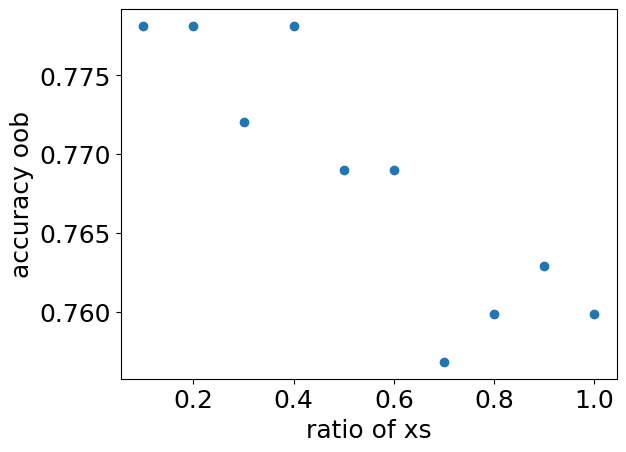

最適なx: 0.1


,importance
Al2O3/SiO2,0.163768
H2O/SiO2,0.131996
NaOH/SiO2,0.142058
KOH/SiO2,0.114179
CsOH/SiO2,0.024064
MOH/SiO2,0.161398
temperature,0.138063
time,0.124473


In [5]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

dataset=pd.read_csv('zeolite_Amorphous.csv', index_col=0, header=0)
x=dataset.iloc[:, 0:8]
y=dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=5)

from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=18
plt.scatter(ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of xs')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")

model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, oob_score=True, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

In [6]:
phase=list(set(y))
phase.sort()

estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase)
display(confusion_matrix_train)
print(f"訓練データの正答率: {metrics.accuracy_score(y_train, estimated_y_train)}")

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase)
display(confusion_matrix_test)
print(f"テストデータの正答率: {metrics.accuracy_score(y_test, estimated_y_test)}")

,ANA,Amorphous,BPH,CAN,CHA,EDI,ERI/OFF,FAU,GIS,HEU,JBW,KFI,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BPH,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0
HEU,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0


訓練データの正答率: 1.0


,ANA,Amorphous,BPH,CAN,CHA,EDI,ERI/OFF,FAU,GIS,HEU,JBW,KFI,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0
BPH,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CHA,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
EDI,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,0,12,1,0,0,0,1,0,0,0,0,0,0,0,0
GIS,2,1,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0
HEU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


テストデータの正答率: 0.7588652482269503


In [7]:
# ANA
precision_train_ANA = metrics.precision_score(y_train, estimated_y_train, labels=["ANA"], average=None)
recall_train_ANA = metrics.recall_score(y_train, estimated_y_train, labels=["ANA"], average=None)
f1_train_ANA = metrics.f1_score(y_train, estimated_y_train, labels=["ANA"], average=None)
precision_test_ANA = metrics.precision_score(y_test, estimated_y_test, labels=["ANA"], average=None)
recall_test_ANA = metrics.recall_score(y_test, estimated_y_test, labels=["ANA"], average=None)
f1_test_ANA = metrics.f1_score(y_test, estimated_y_test, labels=["ANA"], average=None)
# BPH
precision_train_BPH = metrics.precision_score(y_train, estimated_y_train, labels=["BPH"], average=None)
recall_train_BPH = metrics.recall_score(y_train, estimated_y_train, labels=["BPH"], average=None)
f1_train_BPH = metrics.f1_score(y_train, estimated_y_train, labels=["BPH"], average=None)
precision_test_BPH = metrics.precision_score(y_test, estimated_y_test, labels=["BPH"], average=None)
recall_test_BPH = metrics.recall_score(y_test, estimated_y_test, labels=["BPH"], average=None)
f1_test_BPH = metrics.f1_score(y_test, estimated_y_test, labels=["BPH"], average=None)
# CAN
precision_train_CAN = metrics.precision_score(y_train, estimated_y_train, labels=["CAN"], average=None)
recall_train_CAN = metrics.recall_score(y_train, estimated_y_train, labels=["CAN"], average=None)
f1_train_CAN = metrics.f1_score(y_train, estimated_y_train, labels=["CAN"], average=None)
precision_test_CAN = metrics.precision_score(y_test, estimated_y_test, labels=["CAN"], average=None)
recall_test_CAN = metrics.recall_score(y_test, estimated_y_test, labels=["CAN"], average=None)
f1_test_CAN = metrics.f1_score(y_test, estimated_y_test, labels=["CAN"], average=None)
# CHA
precision_train_CHA = metrics.precision_score(y_train, estimated_y_train, labels=["CHA"], average=None)
recall_train_CHA = metrics.recall_score(y_train, estimated_y_train, labels=["CHA"], average=None)
f1_train_CHA = metrics.f1_score(y_train, estimated_y_train, labels=["CHA"], average=None)
precision_test_CHA = metrics.precision_score(y_test, estimated_y_test, labels=["CHA"], average=None)
recall_test_CHA = metrics.recall_score(y_test, estimated_y_test, labels=["CHA"], average=None)
f1_test_CHA = metrics.f1_score(y_test, estimated_y_test, labels=["CHA"], average=None)
# EDI
precision_train_EDI = metrics.precision_score(y_train, estimated_y_train, labels=["EDI"], average=None)
recall_train_EDI = metrics.recall_score(y_train, estimated_y_train, labels=["EDI"], average=None)
f1_train_EDI = metrics.f1_score(y_train, estimated_y_train, labels=["EDI"], average=None)
precision_test_EDI = metrics.precision_score(y_test, estimated_y_test, labels=["EDI"], average=None)
recall_test_EDI = metrics.recall_score(y_test, estimated_y_test, labels=["EDI"], average=None)
f1_test_EDI = metrics.f1_score(y_test, estimated_y_test, labels=["EDI"], average=None)
# ERI/OFF
precision_train_ERI_OFF = metrics.precision_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
recall_train_ERI_OFF = metrics.recall_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
f1_train_ERI_OFF = metrics.f1_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
precision_test_ERI_OFF = metrics.precision_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
recall_test_ERI_OFF = metrics.recall_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
f1_test_ERI_OFF = metrics.f1_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
# FAU
precision_train_FAU = metrics.precision_score(y_train, estimated_y_train, labels=["FAU"], average=None)
recall_train_FAU = metrics.recall_score(y_train, estimated_y_train, labels=["FAU"], average=None)
f1_train_FAU = metrics.f1_score(y_train, estimated_y_train, labels=["FAU"], average=None)
precision_test_FAU = metrics.precision_score(y_test, estimated_y_test, labels=["FAU"], average=None)
recall_test_FAU = metrics.recall_score(y_test, estimated_y_test, labels=["FAU"], average=None)
f1_test_FAU = metrics.f1_score(y_test, estimated_y_test, labels=["FAU"], average=None)
# GIS
precision_train_GIS = metrics.precision_score(y_train, estimated_y_train, labels=["GIS"], average=None)
recall_train_GIS = metrics.recall_score(y_train, estimated_y_train, labels=["GIS"], average=None)
f1_train_GIS = metrics.f1_score(y_train, estimated_y_train, labels=["GIS"], average=None)
precision_test_GIS = metrics.precision_score(y_test, estimated_y_test, labels=["GIS"], average=None)
recall_test_GIS = metrics.recall_score(y_test, estimated_y_test, labels=["GIS"], average=None)
f1_test_GIS = metrics.f1_score(y_test, estimated_y_test, labels=["GIS"], average=None)
# HEU
precision_train_HEU = metrics.precision_score(y_train, estimated_y_train, labels=["HEU"], average=None)
recall_train_HEU = metrics.recall_score(y_train, estimated_y_train, labels=["HEU"], average=None)
f1_train_HEU = metrics.f1_score(y_train, estimated_y_train, labels=["HEU"], average=None)
precision_test_HEU = metrics.precision_score(y_test, estimated_y_test, labels=["HEU"], average=None)
recall_test_HEU = metrics.recall_score(y_test, estimated_y_test, labels=["HEU"], average=None)
f1_test_HEU = metrics.f1_score(y_test, estimated_y_test, labels=["HEU"], average=None)
# JBW
precision_train_JBW = metrics.precision_score(y_train, estimated_y_train, labels=["JBW"], average=None)
recall_train_JBW = metrics.recall_score(y_train, estimated_y_train, labels=["JBW"], average=None)
f1_train_JBW = metrics.f1_score(y_train, estimated_y_train, labels=["JBW"], average=None)
precision_test_JBW = metrics.precision_score(y_test, estimated_y_test, labels=["JBW"], average=None)
recall_test_JBW = metrics.recall_score(y_test, estimated_y_test, labels=["JBW"], average=None)
f1_test_JBW = metrics.f1_score(y_test, estimated_y_test, labels=["JBW"], average=None)
# KFI
precision_train_KFI = metrics.precision_score(y_train, estimated_y_train, labels=["KFI"], average=None)
recall_train_KFI = metrics.recall_score(y_train, estimated_y_train, labels=["KFI"], average=None)
f1_train_KFI = metrics.f1_score(y_train, estimated_y_train, labels=["KFI"], average=None)
precision_test_KFI = metrics.precision_score(y_test, estimated_y_test, labels=["KFI"], average=None)
recall_test_KFI = metrics.recall_score(y_test, estimated_y_test, labels=["KFI"], average=None)
f1_test_KFI = metrics.f1_score(y_test, estimated_y_test, labels=["KFI"], average=None)
# LTA
precision_train_LTA = metrics.precision_score(y_train, estimated_y_train, labels=["LTA"], average=None)
recall_train_LTA = metrics.recall_score(y_train, estimated_y_train, labels=["LTA"], average=None)
f1_train_LTA = metrics.f1_score(y_train, estimated_y_train, labels=["LTA"], average=None)
precision_test_LTA = metrics.precision_score(y_test, estimated_y_test, labels=["LTA"], average=None)
recall_test_LTA = metrics.recall_score(y_test, estimated_y_test, labels=["LTA"], average=None)
f1_test_LTA = metrics.f1_score(y_test, estimated_y_test, labels=["LTA"], average=None)
# LTL
precision_train_LTL = metrics.precision_score(y_train, estimated_y_train, labels=["LTL"], average=None)
recall_train_LTL = metrics.recall_score(y_train, estimated_y_train, labels=["LTL"], average=None)
f1_train_LTL = metrics.f1_score(y_train, estimated_y_train, labels=["LTL"], average=None)
precision_test_LTL = metrics.precision_score(y_test, estimated_y_test, labels=["LTL"], average=None)
recall_test_LTL = metrics.recall_score(y_test, estimated_y_test, labels=["LTL"], average=None)
f1_test_LTL = metrics.f1_score(y_test, estimated_y_test, labels=["LTL"], average=None)
# MER
precision_train_MER = metrics.precision_score(y_train, estimated_y_train, labels=["MER"], average=None)
recall_train_MER = metrics.recall_score(y_train, estimated_y_train, labels=["MER"], average=None)
f1_train_MER = metrics.f1_score(y_train, estimated_y_train, labels=["MER"], average=None)
precision_test_MER = metrics.precision_score(y_test, estimated_y_test, labels=["MER"], average=None)
recall_test_MER = metrics.recall_score(y_test, estimated_y_test, labels=["MER"], average=None)
f1_test_MER = metrics.f1_score(y_test, estimated_y_test, labels=["MER"], average=None)
# MFI
precision_train_MFI = metrics.precision_score(y_train, estimated_y_train, labels=["MFI"], average=None)
recall_train_MFI = metrics.recall_score(y_train, estimated_y_train, labels=["MFI"], average=None)
f1_train_MFI = metrics.f1_score(y_train, estimated_y_train, labels=["MFI"], average=None)
precision_test_MFI = metrics.precision_score(y_test, estimated_y_test, labels=["MFI"], average=None)
recall_test_MFI = metrics.recall_score(y_test, estimated_y_test, labels=["MFI"], average=None)
f1_test_MFI = metrics.f1_score(y_test, estimated_y_test, labels=["MFI"], average=None)
# MOR
precision_train_MOR = metrics.precision_score(y_train, estimated_y_train, labels=["MOR"], average=None)
recall_train_MOR = metrics.recall_score(y_train, estimated_y_train, labels=["MOR"], average=None)
f1_train_MOR = metrics.f1_score(y_train, estimated_y_train, labels=["MOR"], average=None)
precision_test_MOR = metrics.precision_score(y_test, estimated_y_test, labels=["MOR"], average=None)
recall_test_MOR = metrics.recall_score(y_test, estimated_y_test, labels=["MOR"], average=None)
f1_test_MOR = metrics.f1_score(y_test, estimated_y_test, labels=["MOR"], average=None)
# PHI
precision_train_PHI = metrics.precision_score(y_train, estimated_y_train, labels=["PHI"], average=None)
recall_train_PHI = metrics.recall_score(y_train, estimated_y_train, labels=["PHI"], average=None)
f1_train_PHI = metrics.f1_score(y_train, estimated_y_train, labels=["PHI"], average=None)
precision_test_PHI = metrics.precision_score(y_test, estimated_y_test, labels=["PHI"], average=None)
recall_test_PHI = metrics.recall_score(y_test, estimated_y_test, labels=["PHI"], average=None)
f1_test_PHI = metrics.f1_score(y_test, estimated_y_test, labels=["PHI"], average=None)
# RHO
precision_train_RHO = metrics.precision_score(y_train, estimated_y_train, labels=["RHO"], average=None)
recall_train_RHO = metrics.recall_score(y_train, estimated_y_train, labels=["RHO"], average=None)
f1_train_RHO = metrics.f1_score(y_train, estimated_y_train, labels=["RHO"], average=None)
precision_test_RHO = metrics.precision_score(y_test, estimated_y_test, labels=["RHO"], average=None)
recall_test_RHO = metrics.recall_score(y_test, estimated_y_test, labels=["RHO"], average=None)
f1_test_RHO = metrics.f1_score(y_test, estimated_y_test, labels=["RHO"], average=None)
# SOD
precision_train_SOD = metrics.precision_score(y_train, estimated_y_train, labels=["SOD"], average=None)
recall_train_SOD = metrics.recall_score(y_train, estimated_y_train, labels=["SOD"], average=None)
f1_train_SOD = metrics.f1_score(y_train, estimated_y_train, labels=["SOD"], average=None)
precision_test_SOD = metrics.precision_score(y_test, estimated_y_test, labels=["SOD"], average=None)
recall_test_SOD = metrics.recall_score(y_test, estimated_y_test, labels=["SOD"], average=None)
f1_test_SOD = metrics.f1_score(y_test, estimated_y_test, labels=["SOD"], average=None)
# TON
precision_train_TON = metrics.precision_score(y_train, estimated_y_train, labels=["TON"], average=None)
recall_train_TON = metrics.recall_score(y_train, estimated_y_train, labels=["TON"], average=None)
f1_train_TON = metrics.f1_score(y_train, estimated_y_train, labels=["TON"], average=None)
precision_test_TON = metrics.precision_score(y_test, estimated_y_test, labels=["TON"], average=None)
recall_test_TON = metrics.recall_score(y_test, estimated_y_test, labels=["TON"], average=None)
f1_test_TON = metrics.f1_score(y_test, estimated_y_test, labels=["TON"], average=None)
# Amorphous
precision_train_Amorphous = metrics.precision_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
recall_train_Amorphous = metrics.recall_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
f1_train_Amorphous = metrics.f1_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
precision_test_Amorphous = metrics.precision_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)
recall_test_Amorphous = metrics.recall_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)
f1_test_Amorphous = metrics.f1_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)

C:\Users\yamamoto02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
print(f"適合率(Precision)_ANA : 訓練 {precision_train_ANA}, 検証 {precision_test_ANA}")
print(f"再現率(Recall)_ANA : 訓練 {recall_train_ANA}, 検証 {recall_test_ANA}")
print(f"F1スコア_ANA : 訓練 {f1_train_ANA}, 検証 {f1_test_ANA}")
print()
print(f"適合率(Precision)_BPH : 訓練 {precision_train_BPH}, 検証 {precision_test_BPH}")
print(f"再現率(Recall)_BPH : 訓練 {recall_train_BPH}, 検証 {recall_test_BPH}")
print(f"F1スコア_BPH : 訓練 {f1_train_BPH}, 検証 {f1_test_BPH}")
print()
print(f"適合率(Precision)_CAN : 訓練 {precision_train_CAN}, 検証 {precision_test_CAN}")
print(f"再現率(Recall)_CAN : 訓練 {recall_train_CAN}, 検証 {recall_test_CAN}")
print(f"F1スコア_CAN : 訓練 {f1_train_CAN}, 検証 {f1_test_CAN}")
print()
print(f"適合率(Precision)_CHA : 訓練 {precision_train_CHA}, 検証 {precision_test_CHA}")
print(f"再現率(Recall)_CHA : 訓練 {recall_train_CHA}, 検証 {recall_test_CHA}")
print(f"F1スコア_CHA : 訓練 {f1_train_CHA}, 検証 {f1_test_CHA}")
print()
print(f"適合率(Precision)_EDI : 訓練 {precision_train_EDI}, 検証 {precision_test_EDI}")
print(f"再現率(Recall)_EDI : 訓練 {recall_train_EDI}, 検証 {recall_test_EDI}")
print(f"F1スコア_EDI : 訓練 {f1_train_EDI}, 検証 {f1_test_EDI}")
print()
print(f"適合率(Precision)_ERI/OFF : 訓練 {precision_train_ERI_OFF}, 検証 {precision_test_ERI_OFF}")
print(f"再現率(Recall)_ERI/OFF : 訓練 {recall_train_ERI_OFF}, 検証 {recall_test_ERI_OFF}")
print(f"F1スコア_ERI/OFF : 訓練 {f1_train_ERI_OFF}, 検証 {f1_test_ERI_OFF}")
print()
print(f"適合率(Precision)_FAU : 訓練 {precision_train_FAU}, 検証 {precision_test_FAU}")
print(f"再現率(Recall)_FAU : 訓練 {recall_train_FAU}, 検証 {recall_test_FAU}")
print(f"F1スコア_FAU : 訓練 {f1_train_FAU}, 検証 {f1_test_FAU}")
print()
print(f"適合率(Precision)_GIS : 訓練 {precision_train_GIS}, 検証 {precision_test_GIS}")
print(f"再現率(Recall)_GIS : 訓練 {recall_train_GIS}, 検証 {recall_test_GIS}")
print(f"F1スコア_GIS : 訓練 {f1_train_GIS}, 検証 {f1_test_GIS}")
print()
print(f"適合率(Precision)_HEU : 訓練 {precision_train_HEU}, 検証 {precision_test_HEU}")
print(f"再現率(Recall)_HEU : 訓練 {recall_train_HEU}, 検証 {recall_test_HEU}")
print(f"F1スコア_GIS : 訓練 {f1_train_HEU}, 検証 {f1_test_HEU}")
print()
print(f"適合率(Precision)_JBW : 訓練 {precision_train_JBW}, 検証 {precision_test_JBW}")
print(f"再現率(Recall)_JBW : 訓練 {recall_train_JBW}, 検証 {recall_test_JBW}")
print(f"F1スコア_JBW : 訓練 {f1_train_JBW}, 検証 {f1_test_JBW}")
print()
print(f"適合率(Precision)_KFI : 訓練 {precision_train_KFI}, 検証 {precision_test_KFI}")
print(f"再現率(Recall)_KFI : 訓練 {recall_train_KFI}, 検証 {recall_test_KFI}")
print(f"F1スコア_KFI : 訓練 {f1_train_KFI}, 検証 {f1_test_KFI}")
print()
print(f"適合率(Precision)_LTA : 訓練 {precision_train_LTA}, 検証 {precision_test_LTA}")
print(f"再現率(Recall)_LTA : 訓練 {recall_train_LTA}, 検証 {recall_test_LTA}")
print(f"F1スコア_LTA : 訓練 {f1_train_LTA}, 検証 {f1_test_LTA}")
print()
print(f"適合率(Precision)_LTL : 訓練 {precision_train_LTL}, 検証 {precision_test_LTL}")
print(f"再現率(Recall)_LTL : 訓練 {recall_train_LTL}, 検証 {recall_test_LTL}")
print(f"F1スコア_LTL : 訓練 {f1_train_LTL}, 検証 {f1_test_LTL}")
print()
print(f"適合率(Precision)_MER : 訓練 {precision_train_FAU}, 検証 {precision_test_MER}")
print(f"再現率(Recall)_MER : 訓練 {recall_train_FAU}, 検証 {recall_test_MER}")
print(f"F1スコア_MER : 訓練 {f1_train_FAU}, 検証 {f1_test_MER}")
print()
print(f"適合率(Precision)_MFI : 訓練 {precision_train_MFI}, 検証 {precision_test_MFI}")
print(f"再現率(Recall)_MFI : 訓練 {recall_train_MFI}, 検証 {recall_test_MFI}")
print(f"F1スコア_MFI : 訓練 {f1_train_MFI}, 検証 {f1_test_MFI}")
print()
print(f"適合率(Precision)_MOR : 訓練 {precision_train_MOR}, 検証 {precision_test_MOR}")
print(f"再現率(Recall)_MOR : 訓練 {recall_train_MOR}, 検証 {recall_test_MOR}")
print(f"F1スコア_MOR : 訓練 {f1_train_MOR}, 検証 {f1_test_MOR}")
print()
print(f"適合率(Precision)_PHI : 訓練 {precision_train_PHI}, 検証 {precision_test_PHI}")
print(f"再現率(Recall)_PHI : 訓練 {recall_train_PHI}, 検証 {recall_test_PHI}")
print(f"F1スコア_PHI : 訓練 {f1_train_PHI}, 検証 {f1_test_PHI}")
print()
print(f"適合率(Precision)_RHO : 訓練 {precision_train_RHO}, 検証 {precision_test_RHO}")
print(f"再現率(Recall)_RHO : 訓練 {recall_train_RHO}, 検証 {recall_test_RHO}")
print(f"F1スコア_RHO : 訓練 {f1_train_RHO}, 検証 {f1_test_RHO}")
print()
print(f"適合率(Precision)_SOD : 訓練 {precision_train_SOD}, 検証 {precision_test_SOD}")
print(f"再現率(Recall)_SOD : 訓練 {recall_train_SOD}, 検証 {recall_test_SOD}")
print(f"F1スコア_SOD : 訓練 {f1_train_SOD}, 検証 {f1_test_SOD}")
print()
print(f"適合率(Precision)_TON : 訓練 {precision_train_TON}, 検証 {precision_test_TON}")
print(f"再現率(Recall)_TON : 訓練 {recall_train_TON}, 検証 {recall_test_TON}")
print(f"F1スコア_TON : 訓練 {f1_train_TON}, 検証 {f1_test_TON}")
print()
print(f"適合率(Precision)_Amorphous : 訓練 {precision_train_Amorphous}, 検証 {precision_test_Amorphous}")
print(f"再現率(Recall)_Amorphous : 訓練 {recall_train_Amorphous}, 検証 {recall_test_Amorphous}")
print(f"F1スコア_Amorphous : 訓練 {f1_train_Amorphous}, 検証 {f1_test_Amorphous}")

適合率(Precision)_ANA : 訓練 [1.], 検証 [0.71428571]
再現率(Recall)_ANA : 訓練 [1.], 検証 [0.83333333]
F1スコア_ANA : 訓練 [1.], 検証 [0.76923077]

適合率(Precision)_BPH : 訓練 [1.], 検証 [1.]
再現率(Recall)_BPH : 訓練 [1.], 検証 [0.5]
F1スコア_BPH : 訓練 [1.], 検証 [0.66666667]

適合率(Precision)_CAN : 訓練 [1.], 検証 [1.]
再現率(Recall)_CAN : 訓練 [1.], 検証 [0.75]
F1スコア_CAN : 訓練 [1.], 検証 [0.85714286]

適合率(Precision)_CHA : 訓練 [1.], 検証 [0.28571429]
再現率(Recall)_CHA : 訓練 [1.], 検証 [0.5]
F1スコア_CHA : 訓練 [1.], 検証 [0.36363636]

適合率(Precision)_EDI : 訓練 [1.], 検証 [0.66666667]
再現率(Recall)_EDI : 訓練 [1.], 検証 [0.66666667]
F1スコア_EDI : 訓練 [1.], 検証 [0.66666667]

適合率(Precision)_ERI/OFF : 訓練 [1.], 検証 [0.77777778]
再現率(Recall)_ERI/OFF : 訓練 [1.], 検証 [1.]
F1スコア_ERI/OFF : 訓練 [1.], 検証 [0.875]

適合率(Precision)_FAU : 訓練 [1.], 検証 [0.70588235]
再現率(Recall)_FAU : 訓練 [1.], 検証 [0.85714286]
F1スコア_FAU : 訓練 [1.], 検証 [0.77419355]

適合率(Precision)_GIS : 訓練 [1.], 検証 [0.6]
再現率(Recall)_GIS : 訓練 [1.], 検証 [0.42857143]
F1スコア_GIS : 訓練 [1.], 検証 [0.5]

適合率(Precision)_HEU : 訓練 [1.], 検証 [0

# OHのみ

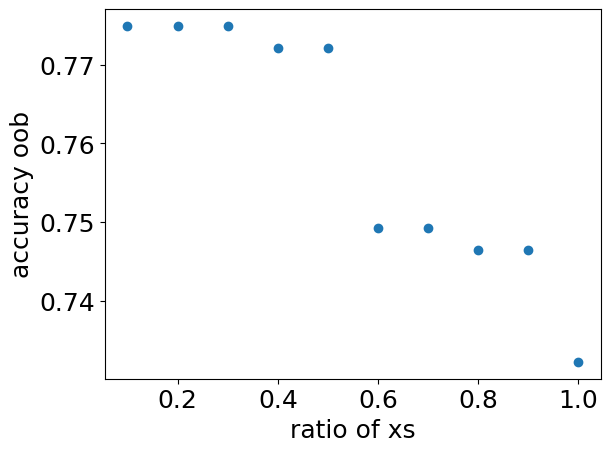

最適なx: 0.1


,importance
Al2O3/SiO2,0.216993
H2O/SiO2,0.184246
MOH/SiO2,0.237825
temperature,0.193186
time,0.167751


In [5]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
dataset=pd.read_csv('zeolite_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)

from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=5)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=18
plt.scatter(ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of xs')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")

model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, oob_score=True, random_state=5)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

In [6]:
phase=list(set(y))
phase.sort()

estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase)
display(confusion_matrix_train)
print(f"訓練データの正答率: {metrics.accuracy_score(y_train, estimated_y_train)}")

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase)
display(confusion_matrix_test)
print(f"テストデータの正答率: {metrics.accuracy_score(y_test, estimated_y_test)}")

,ANA,Amorphous,BPH,CAN,CHA,EDI,ERI/OFF,FAU,GIS,HEU,JBW,KFI,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BPH,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0
HEU,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0


訓練データの正答率: 1.0


,ANA,Amorphous,BPH,CAN,CHA,EDI,ERI/OFF,FAU,GIS,HEU,JBW,KFI,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BPH,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
EDI,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
FAU,0,0,0,0,1,0,0,8,2,0,0,0,1,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,1,0,0,0
HEU,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


テストデータの正答率: 0.7606837606837606


In [7]:
# ANA
precision_train_ANA = metrics.precision_score(y_train, estimated_y_train, labels=["ANA"], average=None)
recall_train_ANA = metrics.recall_score(y_train, estimated_y_train, labels=["ANA"], average=None)
f1_train_ANA = metrics.f1_score(y_train, estimated_y_train, labels=["ANA"], average=None)
precision_test_ANA = metrics.precision_score(y_test, estimated_y_test, labels=["ANA"], average=None)
recall_test_ANA = metrics.recall_score(y_test, estimated_y_test, labels=["ANA"], average=None)
f1_test_ANA = metrics.f1_score(y_test, estimated_y_test, labels=["ANA"], average=None)
# BPH
precision_train_BPH = metrics.precision_score(y_train, estimated_y_train, labels=["BPH"], average=None)
recall_train_BPH = metrics.recall_score(y_train, estimated_y_train, labels=["BPH"], average=None)
f1_train_BPH = metrics.f1_score(y_train, estimated_y_train, labels=["BPH"], average=None)
precision_test_BPH = metrics.precision_score(y_test, estimated_y_test, labels=["BPH"], average=None)
recall_test_BPH = metrics.recall_score(y_test, estimated_y_test, labels=["BPH"], average=None)
f1_test_BPH = metrics.f1_score(y_test, estimated_y_test, labels=["BPH"], average=None)
# CAN
precision_train_CAN = metrics.precision_score(y_train, estimated_y_train, labels=["CAN"], average=None)
recall_train_CAN = metrics.recall_score(y_train, estimated_y_train, labels=["CAN"], average=None)
f1_train_CAN = metrics.f1_score(y_train, estimated_y_train, labels=["CAN"], average=None)
precision_test_CAN = metrics.precision_score(y_test, estimated_y_test, labels=["CAN"], average=None)
recall_test_CAN = metrics.recall_score(y_test, estimated_y_test, labels=["CAN"], average=None)
f1_test_CAN = metrics.f1_score(y_test, estimated_y_test, labels=["CAN"], average=None)
# CHA
precision_train_CHA = metrics.precision_score(y_train, estimated_y_train, labels=["CHA"], average=None)
recall_train_CHA = metrics.recall_score(y_train, estimated_y_train, labels=["CHA"], average=None)
f1_train_CHA = metrics.f1_score(y_train, estimated_y_train, labels=["CHA"], average=None)
precision_test_CHA = metrics.precision_score(y_test, estimated_y_test, labels=["CHA"], average=None)
recall_test_CHA = metrics.recall_score(y_test, estimated_y_test, labels=["CHA"], average=None)
f1_test_CHA = metrics.f1_score(y_test, estimated_y_test, labels=["CHA"], average=None)
# EDI
precision_train_EDI = metrics.precision_score(y_train, estimated_y_train, labels=["EDI"], average=None)
recall_train_EDI = metrics.recall_score(y_train, estimated_y_train, labels=["EDI"], average=None)
f1_train_EDI = metrics.f1_score(y_train, estimated_y_train, labels=["EDI"], average=None)
precision_test_EDI = metrics.precision_score(y_test, estimated_y_test, labels=["EDI"], average=None)
recall_test_EDI = metrics.recall_score(y_test, estimated_y_test, labels=["EDI"], average=None)
f1_test_EDI = metrics.f1_score(y_test, estimated_y_test, labels=["EDI"], average=None)
# ERI/OFF
precision_train_ERI_OFF = metrics.precision_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
recall_train_ERI_OFF = metrics.recall_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
f1_train_ERI_OFF = metrics.f1_score(y_train, estimated_y_train, labels=["ERI/OFF"], average=None)
precision_test_ERI_OFF = metrics.precision_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
recall_test_ERI_OFF = metrics.recall_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
f1_test_ERI_OFF = metrics.f1_score(y_test, estimated_y_test, labels=["ERI/OFF"], average=None)
# FAU
precision_train_FAU = metrics.precision_score(y_train, estimated_y_train, labels=["FAU"], average=None)
recall_train_FAU = metrics.recall_score(y_train, estimated_y_train, labels=["FAU"], average=None)
f1_train_FAU = metrics.f1_score(y_train, estimated_y_train, labels=["FAU"], average=None)
precision_test_FAU = metrics.precision_score(y_test, estimated_y_test, labels=["FAU"], average=None)
recall_test_FAU = metrics.recall_score(y_test, estimated_y_test, labels=["FAU"], average=None)
f1_test_FAU = metrics.f1_score(y_test, estimated_y_test, labels=["FAU"], average=None)
# GIS
precision_train_GIS = metrics.precision_score(y_train, estimated_y_train, labels=["GIS"], average=None)
recall_train_GIS = metrics.recall_score(y_train, estimated_y_train, labels=["GIS"], average=None)
f1_train_GIS = metrics.f1_score(y_train, estimated_y_train, labels=["GIS"], average=None)
precision_test_GIS = metrics.precision_score(y_test, estimated_y_test, labels=["GIS"], average=None)
recall_test_GIS = metrics.recall_score(y_test, estimated_y_test, labels=["GIS"], average=None)
f1_test_GIS = metrics.f1_score(y_test, estimated_y_test, labels=["GIS"], average=None)
# HEU
precision_train_HEU = metrics.precision_score(y_train, estimated_y_train, labels=["HEU"], average=None)
recall_train_HEU = metrics.recall_score(y_train, estimated_y_train, labels=["HEU"], average=None)
f1_train_HEU = metrics.f1_score(y_train, estimated_y_train, labels=["HEU"], average=None)
precision_test_HEU = metrics.precision_score(y_test, estimated_y_test, labels=["HEU"], average=None)
recall_test_HEU = metrics.recall_score(y_test, estimated_y_test, labels=["HEU"], average=None)
f1_test_HEU = metrics.f1_score(y_test, estimated_y_test, labels=["HEU"], average=None)
# JBW
precision_train_JBW = metrics.precision_score(y_train, estimated_y_train, labels=["JBW"], average=None)
recall_train_JBW = metrics.recall_score(y_train, estimated_y_train, labels=["JBW"], average=None)
f1_train_JBW = metrics.f1_score(y_train, estimated_y_train, labels=["JBW"], average=None)
precision_test_JBW = metrics.precision_score(y_test, estimated_y_test, labels=["JBW"], average=None)
recall_test_JBW = metrics.recall_score(y_test, estimated_y_test, labels=["JBW"], average=None)
f1_test_JBW = metrics.f1_score(y_test, estimated_y_test, labels=["JBW"], average=None)
# KFI
precision_train_KFI = metrics.precision_score(y_train, estimated_y_train, labels=["KFI"], average=None)
recall_train_KFI = metrics.recall_score(y_train, estimated_y_train, labels=["KFI"], average=None)
f1_train_KFI = metrics.f1_score(y_train, estimated_y_train, labels=["KFI"], average=None)
precision_test_KFI = metrics.precision_score(y_test, estimated_y_test, labels=["KFI"], average=None)
recall_test_KFI = metrics.recall_score(y_test, estimated_y_test, labels=["KFI"], average=None)
f1_test_KFI = metrics.f1_score(y_test, estimated_y_test, labels=["KFI"], average=None)
# LTA
precision_train_LTA = metrics.precision_score(y_train, estimated_y_train, labels=["LTA"], average=None)
recall_train_LTA = metrics.recall_score(y_train, estimated_y_train, labels=["LTA"], average=None)
f1_train_LTA = metrics.f1_score(y_train, estimated_y_train, labels=["LTA"], average=None)
precision_test_LTA = metrics.precision_score(y_test, estimated_y_test, labels=["LTA"], average=None)
recall_test_LTA = metrics.recall_score(y_test, estimated_y_test, labels=["LTA"], average=None)
f1_test_LTA = metrics.f1_score(y_test, estimated_y_test, labels=["LTA"], average=None)
# LTL
precision_train_LTL = metrics.precision_score(y_train, estimated_y_train, labels=["LTL"], average=None)
recall_train_LTL = metrics.recall_score(y_train, estimated_y_train, labels=["LTL"], average=None)
f1_train_LTL = metrics.f1_score(y_train, estimated_y_train, labels=["LTL"], average=None)
precision_test_LTL = metrics.precision_score(y_test, estimated_y_test, labels=["LTL"], average=None)
recall_test_LTL = metrics.recall_score(y_test, estimated_y_test, labels=["LTL"], average=None)
f1_test_LTL = metrics.f1_score(y_test, estimated_y_test, labels=["LTL"], average=None)
# MER
precision_train_MER = metrics.precision_score(y_train, estimated_y_train, labels=["MER"], average=None)
recall_train_MER = metrics.recall_score(y_train, estimated_y_train, labels=["MER"], average=None)
f1_train_MER = metrics.f1_score(y_train, estimated_y_train, labels=["MER"], average=None)
precision_test_MER = metrics.precision_score(y_test, estimated_y_test, labels=["MER"], average=None)
recall_test_MER = metrics.recall_score(y_test, estimated_y_test, labels=["MER"], average=None)
f1_test_MER = metrics.f1_score(y_test, estimated_y_test, labels=["MER"], average=None)
# MFI
precision_train_MFI = metrics.precision_score(y_train, estimated_y_train, labels=["MFI"], average=None)
recall_train_MFI = metrics.recall_score(y_train, estimated_y_train, labels=["MFI"], average=None)
f1_train_MFI = metrics.f1_score(y_train, estimated_y_train, labels=["MFI"], average=None)
precision_test_MFI = metrics.precision_score(y_test, estimated_y_test, labels=["MFI"], average=None)
recall_test_MFI = metrics.recall_score(y_test, estimated_y_test, labels=["MFI"], average=None)
f1_test_MFI = metrics.f1_score(y_test, estimated_y_test, labels=["MFI"], average=None)
# MOR
precision_train_MOR = metrics.precision_score(y_train, estimated_y_train, labels=["MOR"], average=None)
recall_train_MOR = metrics.recall_score(y_train, estimated_y_train, labels=["MOR"], average=None)
f1_train_MOR = metrics.f1_score(y_train, estimated_y_train, labels=["MOR"], average=None)
precision_test_MOR = metrics.precision_score(y_test, estimated_y_test, labels=["MOR"], average=None)
recall_test_MOR = metrics.recall_score(y_test, estimated_y_test, labels=["MOR"], average=None)
f1_test_MOR = metrics.f1_score(y_test, estimated_y_test, labels=["MOR"], average=None)
# PHI
precision_train_PHI = metrics.precision_score(y_train, estimated_y_train, labels=["PHI"], average=None)
recall_train_PHI = metrics.recall_score(y_train, estimated_y_train, labels=["PHI"], average=None)
f1_train_PHI = metrics.f1_score(y_train, estimated_y_train, labels=["PHI"], average=None)
precision_test_PHI = metrics.precision_score(y_test, estimated_y_test, labels=["PHI"], average=None)
recall_test_PHI = metrics.recall_score(y_test, estimated_y_test, labels=["PHI"], average=None)
f1_test_PHI = metrics.f1_score(y_test, estimated_y_test, labels=["PHI"], average=None)
# RHO
precision_train_RHO = metrics.precision_score(y_train, estimated_y_train, labels=["RHO"], average=None)
recall_train_RHO = metrics.recall_score(y_train, estimated_y_train, labels=["RHO"], average=None)
f1_train_RHO = metrics.f1_score(y_train, estimated_y_train, labels=["RHO"], average=None)
precision_test_RHO = metrics.precision_score(y_test, estimated_y_test, labels=["RHO"], average=None)
recall_test_RHO = metrics.recall_score(y_test, estimated_y_test, labels=["RHO"], average=None)
f1_test_RHO = metrics.f1_score(y_test, estimated_y_test, labels=["RHO"], average=None)
# SOD
precision_train_SOD = metrics.precision_score(y_train, estimated_y_train, labels=["SOD"], average=None)
recall_train_SOD = metrics.recall_score(y_train, estimated_y_train, labels=["SOD"], average=None)
f1_train_SOD = metrics.f1_score(y_train, estimated_y_train, labels=["SOD"], average=None)
precision_test_SOD = metrics.precision_score(y_test, estimated_y_test, labels=["SOD"], average=None)
recall_test_SOD = metrics.recall_score(y_test, estimated_y_test, labels=["SOD"], average=None)
f1_test_SOD = metrics.f1_score(y_test, estimated_y_test, labels=["SOD"], average=None)
# TON
precision_train_TON = metrics.precision_score(y_train, estimated_y_train, labels=["TON"], average=None)
recall_train_TON = metrics.recall_score(y_train, estimated_y_train, labels=["TON"], average=None)
f1_train_TON = metrics.f1_score(y_train, estimated_y_train, labels=["TON"], average=None)
precision_test_TON = metrics.precision_score(y_test, estimated_y_test, labels=["TON"], average=None)
recall_test_TON = metrics.recall_score(y_test, estimated_y_test, labels=["TON"], average=None)
f1_test_TON = metrics.f1_score(y_test, estimated_y_test, labels=["TON"], average=None)
# Amorphous
precision_train_Amorphous = metrics.precision_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
recall_train_Amorphous = metrics.recall_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
f1_train_Amorphous = metrics.f1_score(y_train, estimated_y_train, labels=["Amorphous"], average=None)
precision_test_Amorphous = metrics.precision_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)
recall_test_Amorphous = metrics.recall_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)
f1_test_Amorphous = metrics.f1_score(y_test, estimated_y_test, labels=["Amorphous"], average=None)

In [8]:
print(f"適合率(Precision)_ANA : 訓練 {precision_train_ANA}, 検証 {precision_test_ANA}")
print(f"再現率(Recall)_ANA : 訓練 {recall_train_ANA}, 検証 {recall_test_ANA}")
print(f"F1スコア_ANA : 訓練 {f1_train_ANA}, 検証 {f1_test_ANA}")
print()
print(f"適合率(Precision)_BPH : 訓練 {precision_train_BPH}, 検証 {precision_test_BPH}")
print(f"再現率(Recall)_BPH : 訓練 {recall_train_BPH}, 検証 {recall_test_BPH}")
print(f"F1スコア_BPH : 訓練 {f1_train_BPH}, 検証 {f1_test_BPH}")
print()
print(f"適合率(Precision)_CAN : 訓練 {precision_train_CAN}, 検証 {precision_test_CAN}")
print(f"再現率(Recall)_CAN : 訓練 {recall_train_CAN}, 検証 {recall_test_CAN}")
print(f"F1スコア_CAN : 訓練 {f1_train_CAN}, 検証 {f1_test_CAN}")
print()
print(f"適合率(Precision)_CHA : 訓練 {precision_train_CHA}, 検証 {precision_test_CHA}")
print(f"再現率(Recall)_CHA : 訓練 {recall_train_CHA}, 検証 {recall_test_CHA}")
print(f"F1スコア_CHA : 訓練 {f1_train_CHA}, 検証 {f1_test_CHA}")
print()
print(f"適合率(Precision)_EDI : 訓練 {precision_train_EDI}, 検証 {precision_test_EDI}")
print(f"再現率(Recall)_EDI : 訓練 {recall_train_EDI}, 検証 {recall_test_EDI}")
print(f"F1スコア_EDI : 訓練 {f1_train_EDI}, 検証 {f1_test_EDI}")
print()
print(f"適合率(Precision)_ERI/OFF : 訓練 {precision_train_ERI_OFF}, 検証 {precision_test_ERI_OFF}")
print(f"再現率(Recall)_ERI/OFF : 訓練 {recall_train_ERI_OFF}, 検証 {recall_test_ERI_OFF}")
print(f"F1スコア_ERI/OFF : 訓練 {f1_train_ERI_OFF}, 検証 {f1_test_ERI_OFF}")
print()
print(f"適合率(Precision)_FAU : 訓練 {precision_train_FAU}, 検証 {precision_test_FAU}")
print(f"再現率(Recall)_FAU : 訓練 {recall_train_FAU}, 検証 {recall_test_FAU}")
print(f"F1スコア_FAU : 訓練 {f1_train_FAU}, 検証 {f1_test_FAU}")
print()
print(f"適合率(Precision)_GIS : 訓練 {precision_train_GIS}, 検証 {precision_test_GIS}")
print(f"再現率(Recall)_GIS : 訓練 {recall_train_GIS}, 検証 {recall_test_GIS}")
print(f"F1スコア_GIS : 訓練 {f1_train_GIS}, 検証 {f1_test_GIS}")
print()
print(f"適合率(Precision)_HEU : 訓練 {precision_train_HEU}, 検証 {precision_test_HEU}")
print(f"再現率(Recall)_HEU : 訓練 {recall_train_HEU}, 検証 {recall_test_HEU}")
print(f"F1スコア_GIS : 訓練 {f1_train_HEU}, 検証 {f1_test_HEU}")
print()
print(f"適合率(Precision)_JBW : 訓練 {precision_train_JBW}, 検証 {precision_test_JBW}")
print(f"再現率(Recall)_JBW : 訓練 {recall_train_JBW}, 検証 {recall_test_JBW}")
print(f"F1スコア_JBW : 訓練 {f1_train_JBW}, 検証 {f1_test_JBW}")
print()
print(f"適合率(Precision)_KFI : 訓練 {precision_train_KFI}, 検証 {precision_test_KFI}")
print(f"再現率(Recall)_KFI : 訓練 {recall_train_KFI}, 検証 {recall_test_KFI}")
print(f"F1スコア_KFI : 訓練 {f1_train_KFI}, 検証 {f1_test_KFI}")
print()
print(f"適合率(Precision)_LTA : 訓練 {precision_train_LTA}, 検証 {precision_test_LTA}")
print(f"再現率(Recall)_LTA : 訓練 {recall_train_LTA}, 検証 {recall_test_LTA}")
print(f"F1スコア_LTA : 訓練 {f1_train_LTA}, 検証 {f1_test_LTA}")
print()
print(f"適合率(Precision)_LTL : 訓練 {precision_train_LTL}, 検証 {precision_test_LTL}")
print(f"再現率(Recall)_LTL : 訓練 {recall_train_LTL}, 検証 {recall_test_LTL}")
print(f"F1スコア_LTL : 訓練 {f1_train_LTL}, 検証 {f1_test_LTL}")
print()
print(f"適合率(Precision)_MER : 訓練 {precision_train_FAU}, 検証 {precision_test_MER}")
print(f"再現率(Recall)_MER : 訓練 {recall_train_FAU}, 検証 {recall_test_MER}")
print(f"F1スコア_MER : 訓練 {f1_train_FAU}, 検証 {f1_test_MER}")
print()
print(f"適合率(Precision)_MFI : 訓練 {precision_train_MFI}, 検証 {precision_test_MFI}")
print(f"再現率(Recall)_MFI : 訓練 {recall_train_MFI}, 検証 {recall_test_MFI}")
print(f"F1スコア_MFI : 訓練 {f1_train_MFI}, 検証 {f1_test_MFI}")
print()
print(f"適合率(Precision)_MOR : 訓練 {precision_train_MOR}, 検証 {precision_test_MOR}")
print(f"再現率(Recall)_MOR : 訓練 {recall_train_MOR}, 検証 {recall_test_MOR}")
print(f"F1スコア_MOR : 訓練 {f1_train_MOR}, 検証 {f1_test_MOR}")
print()
print(f"適合率(Precision)_PHI : 訓練 {precision_train_PHI}, 検証 {precision_test_PHI}")
print(f"再現率(Recall)_PHI : 訓練 {recall_train_PHI}, 検証 {recall_test_PHI}")
print(f"F1スコア_PHI : 訓練 {f1_train_PHI}, 検証 {f1_test_PHI}")
print()
print(f"適合率(Precision)_RHO : 訓練 {precision_train_RHO}, 検証 {precision_test_RHO}")
print(f"再現率(Recall)_RHO : 訓練 {recall_train_RHO}, 検証 {recall_test_RHO}")
print(f"F1スコア_RHO : 訓練 {f1_train_RHO}, 検証 {f1_test_RHO}")
print()
print(f"適合率(Precision)_SOD : 訓練 {precision_train_SOD}, 検証 {precision_test_SOD}")
print(f"再現率(Recall)_SOD : 訓練 {recall_train_SOD}, 検証 {recall_test_SOD}")
print(f"F1スコア_SOD : 訓練 {f1_train_SOD}, 検証 {f1_test_SOD}")
print()
print(f"適合率(Precision)_TON : 訓練 {precision_train_TON}, 検証 {precision_test_TON}")
print(f"再現率(Recall)_TON : 訓練 {recall_train_TON}, 検証 {recall_test_TON}")
print(f"F1スコア_TON : 訓練 {f1_train_TON}, 検証 {f1_test_TON}")
print()
print(f"適合率(Precision)_Amorphous : 訓練 {precision_train_Amorphous}, 検証 {precision_test_Amorphous}")
print(f"再現率(Recall)_Amorphous : 訓練 {recall_train_Amorphous}, 検証 {recall_test_Amorphous}")
print(f"F1スコア_Amorphous : 訓練 {f1_train_Amorphous}, 検証 {f1_test_Amorphous}")

適合率(Precision)_ANA : 訓練 [1.], 検証 [1.]
再現率(Recall)_ANA : 訓練 [1.], 検証 [0.8]
F1スコア_ANA : 訓練 [1.], 検証 [0.88888889]

適合率(Precision)_BPH : 訓練 [1.], 検証 [1.]
再現率(Recall)_BPH : 訓練 [1.], 検証 [1.]
F1スコア_BPH : 訓練 [1.], 検証 [1.]

適合率(Precision)_CAN : 訓練 [1.], 検証 [0.75]
再現率(Recall)_CAN : 訓練 [1.], 検証 [1.]
F1スコア_CAN : 訓練 [1.], 検証 [0.85714286]

適合率(Precision)_CHA : 訓練 [1.], 検証 [0.4]
再現率(Recall)_CHA : 訓練 [1.], 検証 [0.66666667]
F1スコア_CHA : 訓練 [1.], 検証 [0.5]

適合率(Precision)_EDI : 訓練 [1.], 検証 [1.]
再現率(Recall)_EDI : 訓練 [1.], 検証 [0.8]
F1スコア_EDI : 訓練 [1.], 検証 [0.88888889]

適合率(Precision)_ERI/OFF : 訓練 [1.], 検証 [0.83333333]
再現率(Recall)_ERI/OFF : 訓練 [1.], 検証 [0.83333333]
F1スコア_ERI/OFF : 訓練 [1.], 検証 [0.83333333]

適合率(Precision)_FAU : 訓練 [1.], 検証 [0.66666667]
再現率(Recall)_FAU : 訓練 [1.], 検証 [0.66666667]
F1スコア_FAU : 訓練 [1.], 検証 [0.66666667]

適合率(Precision)_GIS : 訓練 [1.], 検証 [0.57142857]
再現率(Recall)_GIS : 訓練 [1.], 検証 [0.66666667]
F1スコア_GIS : 訓練 [1.], 検証 [0.61538462]

適合率(Precision)_HEU : 訓練 [1.], 検証 [1.]
再現率(Recall)_HEU 